# 奇异值分解

奇异值分解是一类矩阵分解方法，它能够将一个大矩阵转化成几个小矩阵相乘的形式，这些小矩阵中蕴含着大矩阵的很多重要特征。正如我们要记住一张陌生的脸总是先记住这张脸的种种特征一样，奇异值分解能够帮助我们从矩阵中提取特征，而这些特征正是我们“认识”这个矩阵的重要桥梁。在人工智能非常流行的今天，奇异值分解也不仅仅只是一个数学问题，而被更广泛地应用到图片压缩，图片去噪，数据降维，推荐系统等等方面中去。本文将着重介绍奇异值分解的背景知识以及应用。

## 矩阵坐标变换

奇异值分解可以非常简明地使用数学语言描述：

>对于每一个线性映射T: Kn → Km，T把Kn的第i个基向量映射为Km的第i个基向量的非负倍数，然后将余下的基向量映射为零向量。对照这些基向量，映射T就可以表示为一个非负对角阵。

然而这样的概括太过抽象，因此笔者想从比较直观的几何意义来阐明奇异值分解的意义。各位读者可能本科的时候就学过线性代数，线性代数的入门知识就是矩阵乘法，那时候老师只会告诉我们矩阵的乘法法则，可是矩阵乘法的意义特别是物理意义是什么呢？这一小节笔者将尝试从几何的角度阐述矩阵乘法。

首先用一句话概括矩阵乘法的几何意义：矩阵乘法就是将m空间下的一组坐标映射到n空间下坐标的过程。为了能够直观地观察，这里的空间坐标变换全部都限定为二维平面空间。假定现在平面坐标系上有四个点:

$$
p_{1}=\begin{bmatrix}
0\\0 
\end{bmatrix} 
p_{2}=\begin{bmatrix}
0\\1 
\end{bmatrix} 
p_{3}=\begin{bmatrix}
1\\1
\end{bmatrix} 
p_{4}=\begin{bmatrix}
1\\0 
\end{bmatrix}
$$

在坐标系上这几个点构成的图形如下所示：

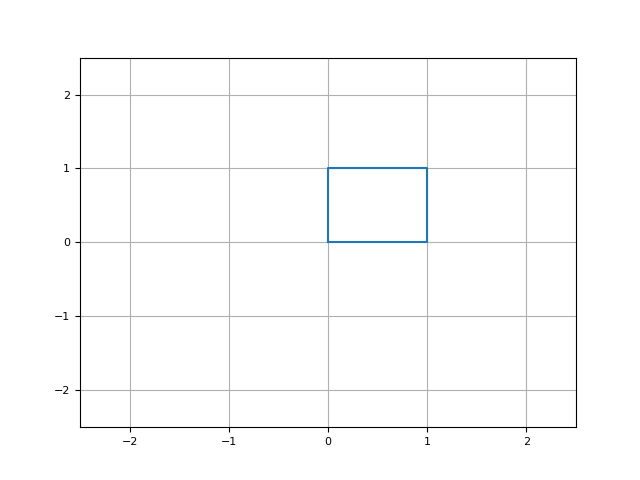

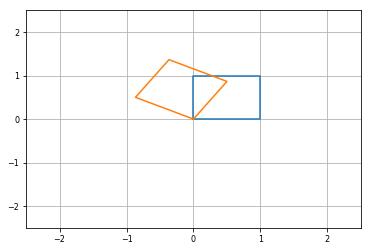

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl

mpl.rcParams["xtick.labelsize"] = 8
mpl.rcParams["ytick.labelsize"] = 8

v = np.asmatrix([[0, 0], [0, 1], [1, 1], [1, 0], [0, 0]], dtype=np.float32)
W = np.asmatrix([[-0.866, 0.5], [0.5, 0.866]], dtype=np.float32)
v1 = (W * v.T).T
fig = plt.figure("test")
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(v[:, 0], v[:, 1])
ax.plot(v1[:, 0], v1[:, 1])

plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

之所以要使用一个矩形来表示是因为这样能够更清楚地显示出矩阵坐标变换对图形的影响。我们都知道：标准坐标系使用标准正交基向量表示就是x轴和y轴方向上的单位向量。在这里有必要解释一下“正交基向量”这个概念：通常我们表示一个坐标系时是选取该坐标系下的一组正交向量来表示，例如二维坐标系那么选取两个相互正交的向量就能够表示，如果是三维坐标系就需要用三个相互正交的向量来表示。而且为了表示方便，通常情况下正交的基向量是单位向量。当然，使用非单位正交向量也能够表示一个坐标系。上图所示的标准坐标系使用标准正交基向量表示就是：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
1 & 0\\ 
0 & 1
\end{bmatrix}
$$

可以看到以上向量两两正交且向量的模为1，则一个点在基向量上的投影可以表示为：

$$p_{i} = W^{T}p_{i}$$

上面的四个点构成的向量集合可以表示为：

$$P=(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}$$

则四个点在两个正交坐标基向量上的投影为：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
1 & 0\\ 
0 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}$$

可以看到，经过标准坐标系的正交基向量的变换（投影），原坐标系上的四个点都没有发生变化，这是当然的，因为这四个点原本就是在标准坐标系下的点。现在我们将这四个点投影到另一个坐标系中。现在设定新坐标系的正交向量为：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
2 & 0\\ 
0 & 1
\end{bmatrix}$$

上面正交向量的表示其x轴上的“单位”向量长度是标准坐标系下基向量长度的2倍，可以预见，通过这个坐标系的变换，原有的矩形会在x轴方向上拉长2倍：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
2 & 0\\ 
0 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0&  2& 2\\ 
0 &  1&  0& 1
\end{bmatrix}$$

直观的形象如下图所示：

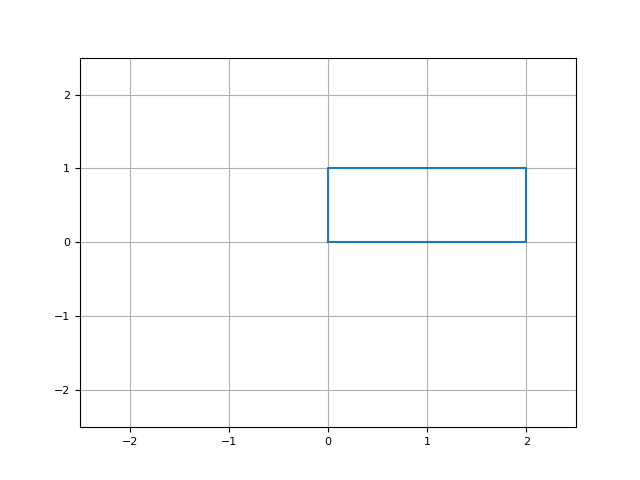

从上面的例子可以总结出一些规律：变换坐标系正交向量的模决定向量变换后的模，如果正交向量的模大于1则会拉长向量，如果小于1则会缩小向量；而正交向量和原坐标系正交基向量的角度决定了向量变换后的旋转角度，由于上面两个例子中变换坐标系的正交向量与原坐标系的正交基向量是平行的，因此变换后的图形只是在大小上发生了变化而并没有产生旋转。接下来，我们可以做一些复杂的变换，现有新的变换坐标系向量：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
2 & 0.3\\ 
1 & 1
\end{bmatrix}$$

上述向量组不但会在长度上拉伸原向量，也会使原向量产生一定的旋转，直观上看会使向量朝着逆时针旋转一定的角度：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
2 & 0.3\\ 
1 & 1
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  1&  2& 3\\ 
0 &  1&  0.3& 1.3
\end{bmatrix}$$

在坐标系中的表示如下图所示：

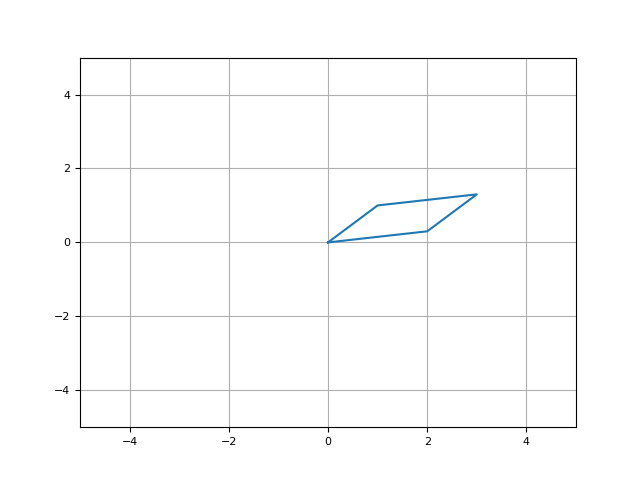

最后，我们来做一个特殊一些的变换：将这个矩形旋转一定的角度但却不改变其形状。通过上面的例子可以知道，要达到这个目的必须使变换坐标系的两个向量正交且保证其为单位向量，这样就不会改变原来矩形的形状和大小。而因为有旋转要求，因此新的坐标系必须和原坐标系有一定的角度：也就是说新坐标系的正交基向量与原坐标系的正交基向量必须成一定的角度。根据三角函数的相关知识，我们可以非常轻松地写出这两个新坐标系的正交基向量：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
cos\theta & -sin\theta\\ 
sin \theta & cos\theta
\end{bmatrix}$$

假如我们想让矩形旋转60度，则可以写出这个矩阵：

$$W = (w_{1}, w_{2}) =  \begin{bmatrix}
0.5 & -0.866\\ 
0.866 & 0.5
\end{bmatrix}$$

变换后的向量组为：

$$P'=W^{T}P=(w_{1}, w_{2})^{T}(p_{1},p_{2},p_{3},p_{4})=\begin{bmatrix}
0.5 & -0.866\\ 
0.866 & 0.5
\end{bmatrix}\begin{bmatrix}
0 &  0&  1& 1\\ 
0 &  1&  0& 1
\end{bmatrix}=\begin{bmatrix}
0 &  0.866&  0.5& 1.366\\ 
0 &  0.5&  -0.866& -0.366
\end{bmatrix}$$

变换后的图形为：

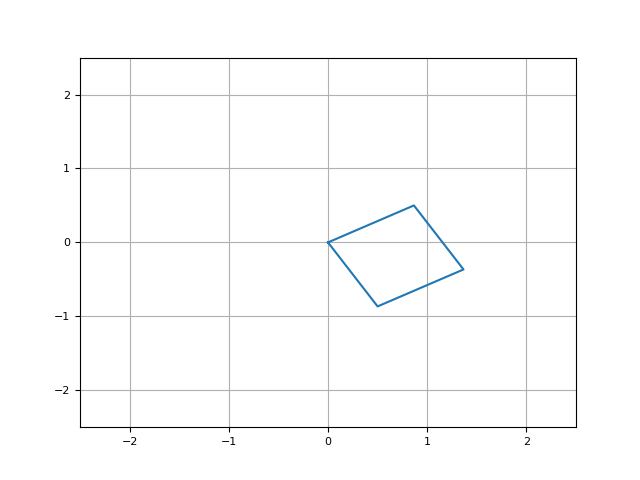

## 矩阵的特征值